In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 5] # default fig size.

In [2]:
def rosenbrock_fun(x1, x2):
    """ This function returns the output of the Rosenbrock function."""
    return (x1 + x2**2)**2


In [17]:
def rosenbrock_gradient(x1, x2):
    """This is the gradient of this function. """
    return np.array([2*(x2**2 + x1), 4*(x1*x2 + x2**3)])

In [44]:
def rosenbrock_hessian(x1, x2):
    h = np.zeros((2, 2))
    h[0,0] = 2
    h[0,1] = 4*x2
    h[1,0] = 4*x2
    h[1,1] = 4*x1 + 12*(x2**2)
    return h

In [45]:
def pk_steepest_descent(gradient):
    """ search direction for steepest decent."""
    return np.array(-1*gradient/np.linalg.norm(gradient))

In [46]:
def pk_newton(gradient, hessian):
    """ search direction for Newton's method."""
    h_inv = np.linalg.inv(hessian)
    return -np.matmul(h_inv, gradient)

In [47]:
# Plot the surface of rosenbrock_fun
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
f = np.zeros((len(x1), len(x2)))
for ii in range(len(x1)):
    for jj in range(len(x2)):
        f[ii, jj] = rosenbrock_fun(x1[ii], x2[jj])

<IPython.core.display.Javascript object>


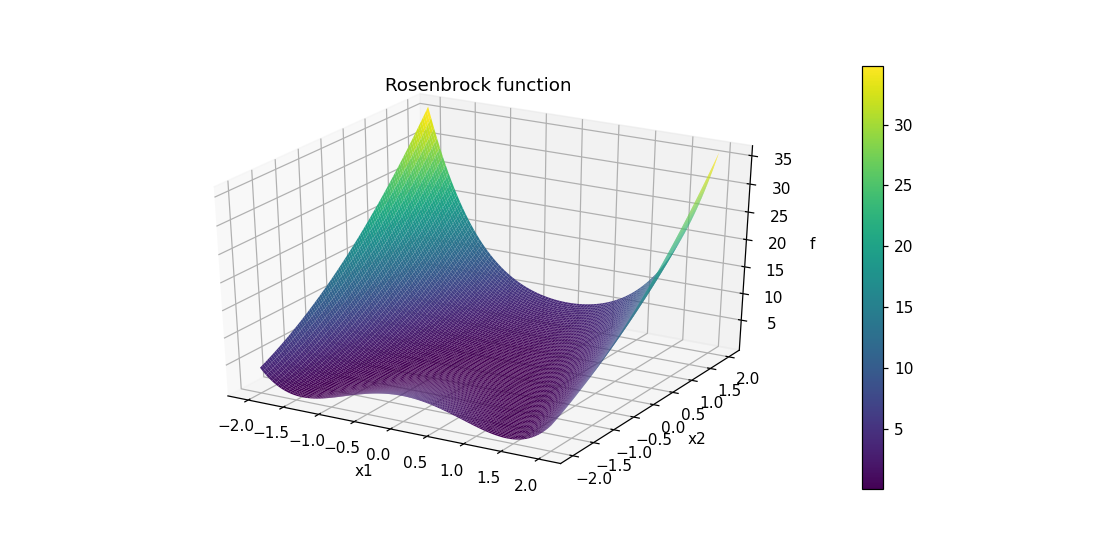

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.plot_surface(X1, X2, f, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
fig.colorbar(im) 
_ = ax.set_title('Rosenbrock function')

_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')
_ = ax.set_zlabel('f')

In [49]:
def find_local_minimum(x0, c1, alpha, p, tol=1e-8, print_num=None, method="sd", save_xk=False):
    """ Find the local minimum point x* using backtracking line search that will satisfy Armijo-Goldstein inequality.
    The avilable methods: Newton and Steepest Descent. Default is Steepest descent. 
    x0 - initial guess for x*. 
    c1 - the slope of Armijo-Goldstein line. 
    alpha - initial step size. 
    p - modify alpha scaler. 
    tol - tolerence. the iterative method will stop when ||gradient|| < tol"""
    
    xk = x0
    k = 0 # iteration number
    alpha_original = alpha
    
    if save_xk:
        xk_arr = np.array([xk])
    
    while (rosenbrock_fun(xk[0], xk[1]) >= tol and np.linalg.norm(rosenbrock_gradient(xk[0], xk[1])) >= tol):
        """ find the next iteration xk+1"""
        gradient = rosenbrock_gradient(xk[0], xk[1])
        
        if method == "sd":
            pk = pk_steepest_descent(gradient)
            
        if method == "newton":
            hessian = rosenbrock_hessian(xk[0], xk[1])
            pk = pk_newton(gradient, hessian)
        
        if print_num is not None:
            if 0 <= k <= 6:
                if k == 0:
                    print("***The first 6 iterations:*** \n")
                print("Iteration #" + str(k) + ", x" + str(k) + " = " + str(xk))
                print("||gradient|| = " + str(np.linalg.norm(gradient)) + "\n")
                print("f = " + str(rosenbrock_fun(xk[0], xk[1])) + "\n")
                print("pk = " + str(pk))
            if print_num-6<=k<=print_num and k>6:
                if k == print_num-6 or k==7:
                    print("***The last 6 iterations:*** \n")
                print("Iteration #" + str(k) + ", x" + str(k) + " = " + str(xk))
                print("||gradient|| = " + str(np.linalg.norm(gradient)) + "\n")
                print("||f|| = " + str(rosenbrock_fun(xk[0], xk[1])) + "\n")
            

        xk_next = xk + alpha*pk
        
        while rosenbrock_fun(xk_next[0], xk_next[1]) > rosenbrock_fun(xk[0], xk[1]) + c1*alpha*np.dot(pk, gradient):
            """ find a step size that will satisfy Armijo-Goldstein inequality. Modify alpha. """
            alpha = p * alpha
            xk_next = xk + alpha*pk
        
        xk = xk_next
        alpha = alpha_original
        k = k + 1
        
        if save_xk:
            xk_arr = np.append(xk_arr, [xk])
            
    if save_xk:
        return xk, k, xk_arr
    
    return xk, k

In [50]:
find_local_minimum(x0=[1, 1], c1=1e-4, alpha=1, p=0.5, tol=1e-8, print_num=11, method="sd")

***The first 6 iterations:*** 

Iteration #0, x0 = [1, 1]
||gradient|| = 8.94427190999916

f = 4

pk = [-0.4472136  -0.89442719]
Iteration #1, x1 = [0.5527864  0.10557281]
||gradient|| = 1.1527313888296755

f = 0.31801932600117777

pk = [-0.97842746 -0.20659067]
Iteration #2, x2 = [-0.42564106 -0.10101786]
||gradient|| = 0.8476607593351216

f = 0.17258744170617685

pk = [ 0.98019507 -0.19803442]
Iteration #3, x3 = [ 0.06445648 -0.20003507]
||gradient|| = 0.2250418035727172

f = 0.010914086938207864

pk = [-0.92845423  0.37144682]
Iteration #4, x4 = [-0.0516003  -0.15360422]
||gradient|| = 0.058595634904809034

f = 0.0007843385671352226

pk = [ 0.95590893 -0.29366329]
Iteration #5, x5 = [-0.02172815 -0.1627812 ]
||gradient|| = 0.010031942938867503

f = 2.2748804180258236e-05

pk = [-0.95087675  0.30956971]
Iteration #6, x6 = [-0.02915687 -0.16036268]
||gradient|| = 0.0072266268535867186

f = 1.1838290948219328e-05

pk = [ 0.95222344 -0.30540221]
***The last 6 iterations:*** 

Iteration 

(array([-0.02601796, -0.16136777]), 11)

In [51]:
find_local_minimum(x0=[1, 1], c1=1e-4, alpha=1, p=0.5, tol=1e-8, print_num=5, method="newton")

***The first 6 iterations:*** 

Iteration #0, x0 = [1, 1]
||gradient|| = 8.94427190999916

f = 4

pk = [-2. -0.]


(array([-1.,  1.]), 1)